<a href="https://colab.research.google.com/github/Santgupt/Projects/blob/master/Project_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('gapminder.csv')

In [3]:
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,Middle East & North Africa
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,America
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0,Europe & Central Asia
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2,East Asia & Pacific


In [4]:
df.tail()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
134,3350832,2.11,0.5,2.489764,26.39123,15317,124.2604,76.0,13.0,America
135,26952719,2.46,0.1,4.476669,25.32054,3733,124.3462,68.7,49.2,Europe & Central Asia
136,86589342,1.86,0.4,1.479347,20.91630,4085,121.9367,75.4,26.2,East Asia & Pacific
137,13114579,5.88,13.6,0.148982,20.68321,3039,132.4493,52.0,94.9,Sub-Saharan Africa
138,13495462,3.85,15.1,0.654323,22.02660,1286,131.9745,49.0,98.3,Sub-Saharan Africa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   population       139 non-null    int64  
 1   fertility        139 non-null    float64
 2   HIV              139 non-null    float64
 3   CO2              139 non-null    float64
 4   BMI_male         139 non-null    float64
 5   GDP              139 non-null    int64  
 6   BMI_female       139 non-null    float64
 7   life             139 non-null    float64
 8   child_mortality  139 non-null    float64
 9   Region           139 non-null    object 
dtypes: float64(7), int64(2), object(1)
memory usage: 11.0+ KB


In [6]:
df.columns

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region'],
      dtype='object')

In [7]:
df.shape

(139, 10)

In [8]:
df.isnull().sum()

population         0
fertility          0
HIV                0
CO2                0
BMI_male           0
GDP                0
BMI_female         0
life               0
child_mortality    0
Region             0
dtype: int64

In [9]:
df.dtypes

population           int64
fertility          float64
HIV                float64
CO2                float64
BMI_male           float64
GDP                  int64
BMI_female         float64
life               float64
child_mortality    float64
Region              object
dtype: object

In [10]:
x = df.drop('fertility',axis=1)

In [11]:
y = df['fertility']

In [12]:
x = pd.get_dummies(x,columns=['Region'],drop_first=True)

In [13]:
type(x)

pandas.core.frame.DataFrame

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
x_scaled=StandardScaler().fit_transform(x)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [18]:
scaler=StandardScaler()

In [19]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [20]:
X_train=scaler.transform(X_train)

In [21]:
X_test=scaler.transform(X_test)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
model=LinearRegression()

In [24]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
model.score(X_test,y_test)

0.9219252007969098

In [26]:
from sklearn.model_selection import cross_val_score

In [27]:
cv_scores=cross_val_score(LinearRegression(),x_scaled,y,cv=5)

In [28]:
cv_scores

array([0.95006051, 0.88509633, 0.83341491, 0.83093602, 0.85702012])

In [29]:
import numpy as np

In [30]:
np.mean(cv_scores)

0.87130557850454

In [31]:
from sklearn.linear_model import Lasso

In [32]:
lasso=Lasso(alpha=0.4)

In [33]:
lasso.fit(x_scaled,y)

Lasso(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [34]:
lasso_coef=lasso.coef_

In [35]:
list(range(len(x.columns)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [36]:
import matplotlib.pyplot as plt

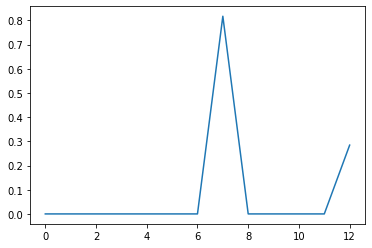

In [37]:
plt.plot(range(len(x.columns)),lasso_coef)
plt.show()

In [38]:
x.columns

Index(['population', 'HIV', 'CO2', 'BMI_male', 'GDP', 'BMI_female', 'life',
       'child_mortality', 'Region_East Asia & Pacific',
       'Region_Europe & Central Asia', 'Region_Middle East & North Africa',
       'Region_South Asia', 'Region_Sub-Saharan Africa'],
      dtype='object')